In [22]:
import pandas as pd

In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [24]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [25]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [26]:
# 1. Load the dataset
datascience_salaries = pd.read_csv('datascience_salaries.csv')
datascience_salaries.head()  # Display the first rows


,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary
0,0,Data scientist,Full Time,Senior,New York City,USD,149000
1,2,Data scientist,Full Time,Senior,Boston,USD,120000
2,3,Data scientist,Full Time,Senior,London,USD,68000
3,4,Data scientist,Full Time,Senior,Boston,USD,120000
4,5,Data scientist,Full Time,Senior,New York City,USD,149000


In [27]:
# 2. Normalize the 'salary' column between 0 and 1
scaler = MinMaxScaler()
datascience_salaries['salary_normalized'] = scaler.fit_transform(datascience_salaries[['salary']])
datascience_salaries[['salary', 'salary_normalized']].head()  # Show normalized salaries


,salary,salary_normalized
0,149000,0.601010
1,120000,0.454545
2,68000,0.191919
3,120000,0.454545
4,149000,0.601010


In [29]:
# 3. Dimensionality reduction with PCA (encode categorical variables)
df_pca = datascience_salaries.select_dtypes(include=['number']).drop(columns=['salary_normalized'])
df_pca = pd.concat([
    df_pca,
    pd.get_dummies(datascience_salaries[['job_title', 'job_type', 'experience_level', 'location', 'salary_currency']])
], axis=1)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_pca)
datascience_salaries['PC1'] = principal_components[:, 0]
datascience_salaries['PC2'] = principal_components[:, 1]
datascience_salaries[['PC1', 'PC2']].head()  # Show PCA columns

,PC1,PC2
0,84163.766082,-949.193388
1,55163.767133,-941.138559
2,3163.768476,-929.281611
3,55163.767550,-939.138560
4,84163.767126,-944.193390


In [30]:
# 4. Group by 'experience_level' and calculate mean and median salary
grouped = datascience_salaries.groupby('experience_level')['salary'].agg(['mean', 'median'])
grouped  # Display the grouped table

,mean,median
experience_level,,
Entry,36111.111111,30000.0
Executive,76076.923077,46000.0
Mid,51786.885246,51000.0
Senior,75088.033012,68000.0


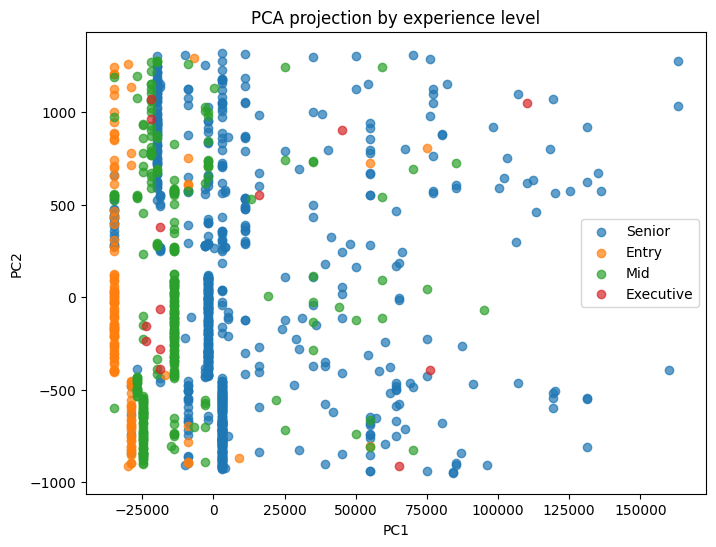

In [31]:
# 5. Visualize the PCA result
plt.figure(figsize=(8,6))
for level in datascience_salaries['experience_level'].unique():
    subset = datascience_salaries[datascience_salaries['experience_level'] == level]
    plt.scatter(subset['PC1'], subset['PC2'], label=level, alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA projection by experience level')
plt.legend()
plt.show()